In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score


In [21]:
data=pd.read_csv('/content/drive/MyDrive/crop_yield(1).csv')

In [22]:
np.random.seed(42)
n_samples = 200

soil_types = ['Clay', 'Sandy', 'Loamy']
seed_types = ['A', 'B', 'C']
rainfall = np.random.normal(loc=200, scale=50, size=n_samples)
soil = np.random.choice(soil_types, n_samples)
seed = np.random.choice(seed_types, n_samples)


In [23]:
yield_category = []
for i in range(n_samples):
    if rainfall[i] > 230 and soil[i] == 'Loamy':
        yield_category.append('High')
    elif rainfall[i] < 170 and seed[i] == 'A':
        yield_category.append('Low')
    else:
        yield_category.append('Medium')

df = pd.DataFrame({
    'Soil': soil,
    'Rainfall': rainfall,
    'SeedType': seed,
    'YieldCategory': yield_category
})


In [24]:
df_encoded = pd.get_dummies(df, columns=['Soil', 'SeedType'], drop_first=True)
label_encoder = LabelEncoder()
df_encoded['YieldCategory'] = label_encoder.fit_transform(df_encoded['YieldCategory'])

In [25]:
X = df_encoded.drop('YieldCategory', axis=1)
y = df_encoded['YieldCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [28]:
print("Classification Report:\n", report)
print(f"Accuracy: {acc:.2f}")
print(f"Precision (weighted): {precision:.2f}")
print(f"Recall (weighted): {recall:.2f}")

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         4
         Low       1.00      0.86      0.92         7
      Medium       0.97      1.00      0.99        39

    accuracy                           0.98        50
   macro avg       0.99      0.95      0.97        50
weighted avg       0.98      0.98      0.98        50

Accuracy: 0.98
Precision (weighted): 0.98
Recall (weighted): 0.98


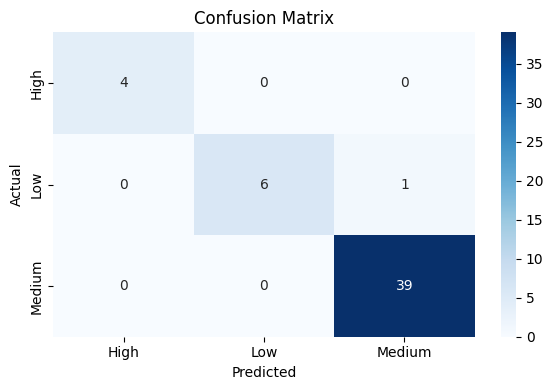

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()